## FFNN on Fashion MNIST

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns


from functions import ReLU, ReLU_der, sigmoid, sigmoid_der, softmax, softmax_der, cross_entropy, cross_entropy_der, leaky_ReLU, leaky_ReLU_der
from nn_class_classification import NeuralNetwork

In [2]:
fashion_mnist = datasets.fetch_openml('Fashion-MNIST', version=1, as_frame=False, parser='liac-arff')

In [3]:
X = fashion_mnist.data.astype(np.float32) / 255.0
y = fashion_mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# define NN and train
np.random.seed(42)

# One layer, 50 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [200, 10]
activation_funcs = [ReLU, softmax]
activation_ders = [ReLU_der, None]

inputs = X_train
targets = y_train

NN = NeuralNetwork(
    X_train,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    cross_entropy,
    None,
    L2=True,
    lmbda=1e-4
)

NN.train_network_plain_gd(lr_method='RMSProp')

test_scores = NN.predict(X_test)
test_predict = np.argmax(test_scores, axis=1)

accuracy = accuracy_score(y_test, test_predict)



In [5]:
# print('stoch gd ADAM', accuracy)

In [6]:
print(accuracy)

0.8135714285714286


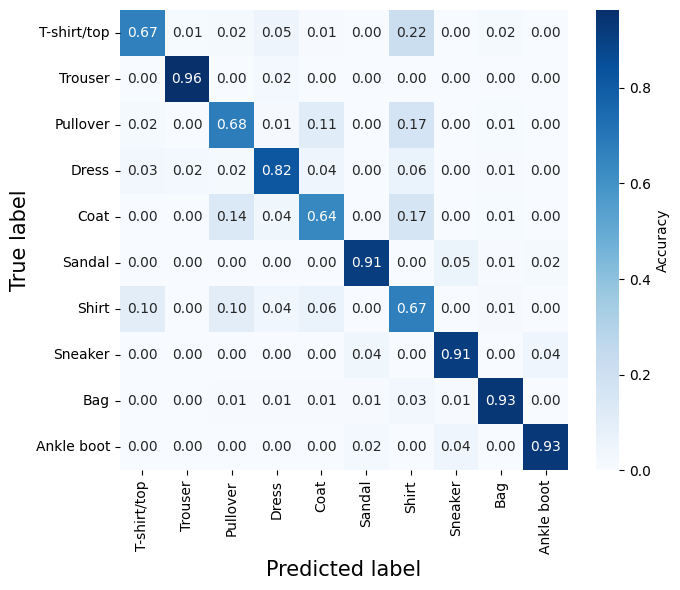

In [7]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
test_scores = NN.predict(X_test)
y_pred = np.argmax(test_scores, axis=1)

# Confusion matrix from scikit-learn
cm = confusion_matrix(y_test, y_pred)

clothing = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=clothing,
            yticklabels=clothing, cbar_kws={'label':'Accuracy'})
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)
plt.tight_layout()
plt.savefig('../Figures/Fashion_MNIST_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()